In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
df = pd.read_csv('20230302_all_exoplanets.csv')

In [3]:
# All known exoplanets (as of 3/2/2023)
df

,pl_name,hostname,pl_letter,hd_name,hip_name,tic_id,gaia_id,sy_snum,sy_pnum,sy_mnum,...,sy_kepmag,sy_kepmagerr1,sy_kepmagerr2,sy_kepmag_reflink,pl_nnotes,st_nphot,st_nrvc,st_nspec,pl_nespec,pl_ntranspec
0,11 Com b,11 Com,b,HD 107383,HIP 60202,TIC 72437047,Gaia DR2 3946945413106333696,2,1,0,...,NaN,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,2.0,1,2,0,0,0
1,11 UMi b,11 UMi,b,HD 136726,HIP 74793,TIC 230061010,Gaia DR2 1696798367260229376,1,1,0,...,NaN,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,0.0,1,1,0,0,0
2,14 And b,14 And,b,HD 221345,HIP 116076,TIC 333225860,Gaia DR2 1920113512486282240,1,1,0,...,NaN,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,0.0,1,1,0,0,0
3,14 Her b,14 Her,b,HD 145675,HIP 79248,TIC 219483057,Gaia DR2 1385293808145621504,1,2,0,...,NaN,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,0.0,1,4,1,0,0
4,16 Cyg B b,16 Cyg B,b,HD 186427,HIP 96901,TIC 27533327,Gaia DR2 2135550755683407232,3,1,0,...,6.095,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,5.0,1,4,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5267,ups And b,ups And,b,HD 9826,HIP 7513,TIC 189576919,Gaia DR2 348020448377061376,2,3,0,...,NaN,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,5.0,1,10,1,0,0
5268,ups And c,ups And,c,HD 9826,HIP 7513,TIC 189576919,Gaia DR2 348020448377061376,2,3,0,...,NaN,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,5.0,1,10,1,0,0
5269,ups And d,ups And,d,HD 9826,HIP 7513,TIC 189576919,Gaia DR2 348020448377061376,2,3,0,...,NaN,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,5.0,1,10,1,0,0
5270,ups Leo b,ups Leo,b,NaN,NaN,TIC 49430557,Gaia DR2 3794167001116433152,1,1,0,...,NaN,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,0.0,0,0,0,0,0


In [4]:
# Create an array of all host star/system names
hosts = df['hostname'].unique()
print("Number of planetary systems: " + str(len(hosts)))

Number of planetary systems: 3943


In [5]:
# For each planetary system...
for host in tqdm(hosts):
    
    # If the system contains less than 3 planets...
    if (df['hostname'] == host).sum() < 3:
        # Get the row indices of the system's planets
        index = df[df['hostname']==host].index
        
        # Remove those rows from our DataFrame
        df.drop(index, inplace=True)

100%|█████████████████████████████████████████████████████████████████████████████| 3943/3943 [00:20<00:00, 190.63it/s]


In [6]:
# DataFrame now contains only systems of three or more planets.
df

,pl_name,hostname,pl_letter,hd_name,hip_name,tic_id,gaia_id,sy_snum,sy_pnum,sy_mnum,...,sy_kepmag,sy_kepmagerr1,sy_kepmagerr2,sy_kepmag_reflink,pl_nnotes,st_nphot,st_nrvc,st_nspec,pl_nespec,pl_ntranspec
17,2MASS J19383260+4603591 b,2MASS J19383260+4603591,b,NaN,NaN,TIC 271164763,Gaia DR2 2080063931448749824,2,3,0,...,12.264,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,1.0,0,0,0,0,0
22,47 UMa b,47 UMa,b,HD 95128,HIP 53721,TIC 21535479,Gaia DR2 777254360337133312,1,3,0,...,NaN,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,NaN,1,9,3,0,0
23,47 UMa c,47 UMa,c,HD 95128,HIP 53721,TIC 21535479,Gaia DR2 777254360337133312,1,3,0,...,NaN,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,NaN,1,9,3,0,0
24,47 UMa d,47 UMa,d,HD 95128,HIP 53721,TIC 21535479,Gaia DR2 777254360337133312,1,3,0,...,NaN,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,NaN,1,9,3,0,0
27,55 Cnc b,55 Cnc,b,HD 75732,HIP 43587,TIC 332064670,Gaia DR2 704967037090946688,2,5,0,...,NaN,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,4.0,1,9,11,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5264,tau Cet g,tau Cet,g,HD 10700,HIP 8102,TIC 419015728,Gaia DR2 2452378776434276992,1,4,0,...,NaN,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,1.0,1,4,10,0,0
5265,tau Cet h,tau Cet,h,HD 10700,HIP 8102,TIC 419015728,Gaia DR2 2452378776434276992,1,4,0,...,NaN,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,1.0,1,4,10,0,0
5267,ups And b,ups And,b,HD 9826,HIP 7513,TIC 189576919,Gaia DR2 348020448377061376,2,3,0,...,NaN,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,5.0,1,10,1,0,0
5268,ups And c,ups And,c,HD 9826,HIP 7513,TIC 189576919,Gaia DR2 348020448377061376,2,3,0,...,NaN,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,5.0,1,10,1,0,0


In [7]:
many_p_hosts = df['hostname'].unique()
print("Number of 3+ planet systems: " + str(len(many_p_hosts)))

Number of 3+ planet systems: 294


In [8]:
# planets dictionary – keys are planet names, values are Booleans
# Value = True if this planet is a member of a pair with P-ratio <= 1.5, False otherwise
planets = {}

# List of all period ratios less than or equal to 1.5
all_p_ratios = []

# lists for calculating the pearson r value
pearson_r_1 = []
pearson_r_2 = []


#Extend pearson r range to 2 just to capture other planets
extend_pearson_r_1 = []
extend_pearson_r_2 = []


#Extend pearson r range to 4 - Rorie and Ellie stuff
extend_4_pearson_r_1 = []
extend_4_pearson_r_2 = []



for host in tqdm(many_p_hosts):
    
    # Create a Data Frame of only this system's planets
    system_df = df[df['hostname'] == host]

    # system — a list of tuples of the form (period, planet_name)
    system = []

    # Populate system, add to planets
    for ind in system_df.index:
        system += [(system_df['pl_orbper'][ind], system_df['pl_name'][ind])]
    
        # Planet values are False by default
        planets[system_df['pl_name'][ind]] = False


    # Sort the system from smallest period to largest
    system.sort()


    # Pratios – a list of tuples of the form (p-ratio, inner_planet_name, outer_planet_name)
    Pratios = []

    # Populate Pratios
    for i in range(len(system) - 1):
    
        # Calculate each period ratio
        ratio = system[i + 1][0] / system[i][0]
    
        Pratios += [(ratio, system[i][1], system[i + 1][1])]

    #If the system has 2 viable period ratios less than 1.5, calculate pearson r
    if len(Pratios) >= 2:
        for index in range(len(Pratios)-1):
            if Pratios[index][0] > 1.5:
                if Pratios[index+1][0] > 1.5:
                    pearson_r_1.append(Pratios[index][0])
                    pearson_r_2.append(Pratios[index+1][0])
                    
                    
            if Pratios[index][0] > 1.5:
                if Pratios[index+1][0] > 1.5:
                    extend_pearson_r_1.append(Pratios[index][0])
                    extend_pearson_r_2.append(Pratios[index+1][0])
                    
            if Pratios[index][0] >1.5:
                if Pratios[index+1][0] >1.5:
                    extend_4_pearson_r_1.append(Pratios[index][0])
                    extend_4_pearson_r_2.append(Pratios[index+1][0])
    # If a planet is a member of a pair with a P-ratio <= 1.5, we want to save it
    for ratio in Pratios:
        if ratio[0] > 1.5:
            planets[ratio[1]] = True
            planets[ratio[2]] = True
            
            # Save this period ratio
            all_p_ratios += [ratio[0]]

# Remove all planets that are not part of a pair with P-ratio <= 1.5
for planet in planets.keys():
    
    if planets[planet] == False:

        planet_index = df[df['pl_name'] == planet].index
        df.drop(planet_index, inplace = True)

df

100%|██████████████████████████████████████████████████████████████████████████████| 294/294 [00:00<00:00, 1816.38it/s]


,pl_name,hostname,pl_letter,hd_name,hip_name,tic_id,gaia_id,sy_snum,sy_pnum,sy_mnum,...,sy_kepmag,sy_kepmagerr1,sy_kepmagerr2,sy_kepmag_reflink,pl_nnotes,st_nphot,st_nrvc,st_nspec,pl_nespec,pl_ntranspec
17,2MASS J19383260+4603591 b,2MASS J19383260+4603591,b,NaN,NaN,TIC 271164763,Gaia DR2 2080063931448749824,2,3,0,...,12.264,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,1.0,0,0,0,0,0
22,47 UMa b,47 UMa,b,HD 95128,HIP 53721,TIC 21535479,Gaia DR2 777254360337133312,1,3,0,...,NaN,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,NaN,1,9,3,0,0
23,47 UMa c,47 UMa,c,HD 95128,HIP 53721,TIC 21535479,Gaia DR2 777254360337133312,1,3,0,...,NaN,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,NaN,1,9,3,0,0
24,47 UMa d,47 UMa,d,HD 95128,HIP 53721,TIC 21535479,Gaia DR2 777254360337133312,1,3,0,...,NaN,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,NaN,1,9,3,0,0
27,55 Cnc b,55 Cnc,b,HD 75732,HIP 43587,TIC 332064670,Gaia DR2 704967037090946688,2,5,0,...,NaN,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,4.0,1,9,11,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5264,tau Cet g,tau Cet,g,HD 10700,HIP 8102,TIC 419015728,Gaia DR2 2452378776434276992,1,4,0,...,NaN,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,1.0,1,4,10,0,0
5265,tau Cet h,tau Cet,h,HD 10700,HIP 8102,TIC 419015728,Gaia DR2 2452378776434276992,1,4,0,...,NaN,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,1.0,1,4,10,0,0
5267,ups And b,ups And,b,HD 9826,HIP 7513,TIC 189576919,Gaia DR2 348020448377061376,2,3,0,...,NaN,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,5.0,1,10,1,0,0
5268,ups And c,ups And,c,HD 9826,HIP 7513,TIC 189576919,Gaia DR2 348020448377061376,2,3,0,...,NaN,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,5.0,1,10,1,0,0


In [9]:
# Data that might be useful to us
planet_data = pd.DataFrame()
planet_data["Planet Name"] = df['pl_name']
planet_data["Host Name"] = df['hostname']
planet_data["Orbital Period"] = df['pl_orbper']
planet_data["Discovery Method"] = df['discoverymethod']

planet_data["Semi-Major Axis (AU)"] = df['pl_orbsmax']
planet_data["Eccentricity"] = df['pl_orbeccen']
planet_data["Radius (R_earth)"] = df['pl_rade']
planet_data["Mass or Mass * sin(i) (M_earth)"] = df['pl_bmasse']
planet_data["Stellar Mass (M_sun)"] = df['st_mass']
planet_data

,Planet Name,Host Name,Orbital Period,Discovery Method,Semi-Major Axis (AU),Eccentricity,Radius (R_earth),Mass or Mass * sin(i) (M_earth),Stellar Mass (M_sun)
17,2MASS J19383260+4603591 b,2MASS J19383260+4603591,406.000000,Eclipse Timing Variations,0.920000,0.3300,13.40,603.87700,0.48
22,47 UMa b,47 UMa,1078.000000,Radial Velocity,2.100000,0.0320,13.20,804.08000,1.06
23,47 UMa c,47 UMa,2391.000000,Radial Velocity,3.600000,0.0980,14.20,171.62100,1.06
24,47 UMa d,47 UMa,14002.000000,Radial Velocity,11.600000,0.1600,13.50,521.22000,1.06
27,55 Cnc b,55 Cnc,14.651600,Radial Velocity,0.113400,0.0000,13.90,263.97850,0.91
...,...,...,...,...,...,...,...,...,...
5264,tau Cet g,tau Cet,20.000000,Radial Velocity,0.133000,0.0600,1.18,1.75000,0.78
5265,tau Cet h,tau Cet,49.410000,Radial Velocity,0.243000,0.2300,1.19,1.83000,0.78
5267,ups And b,ups And,4.617033,Radial Velocity,0.059222,0.0215,14.00,218.53100,1.30
5268,ups And c,ups And,241.258000,Radial Velocity,0.827774,0.2596,12.30,4443.24113,1.30


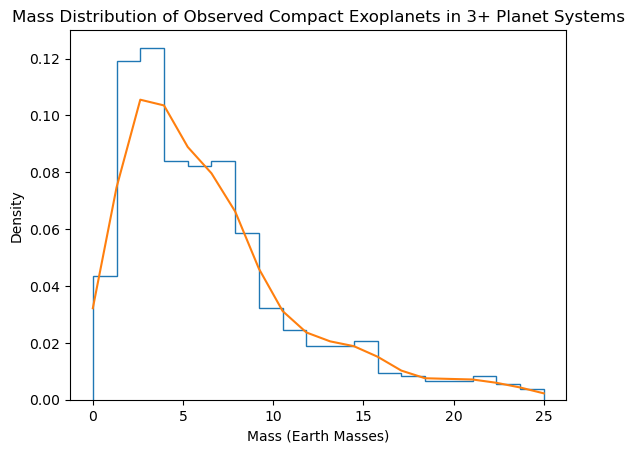

'\nplt.hist(masses, bins =np.linspace(0, 20, 50), color = \'black\', histtype = \'step\', stacked = True);\nplt.xticks(range(1, 10))\nplt.xlabel("Mass (M_earth)");\nplt.ylabel("Number of Planets");\nplt.title("Masses of Planets From Compact Pairs in 3+ Planet Systems")\nplt.legend();\n'

In [10]:
# PLANET MASS (REPORTED IN TABLE)
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.stats as stats
from scipy.stats import lognorm
import math
import random
from numpy.random import seed, random
from scipy.stats import rayleigh
from scipy.stats import norm
import itertools
from decimal import Decimal
import pandas as pd
import seaborn as sns


# Create an array of planet masses
masses = planet_data['Mass or Mass * sin(i) (M_earth)'].to_numpy()

no_nan_masses = masses[~np.isnan(masses)]
no_nan_masses = no_nan_masses[no_nan_masses < 25]
#print(no_nan_masses)

# Create a histogram
density = stats.gaussian_kde(no_nan_masses)
n, x, _ = plt.hist(no_nan_masses,  bins=np.linspace(0, 25, 20),
                   histtype=u'step', density=True)  
plt.plot(x, density(x))
plt.title("Mass Distribution of Observed Compact Exoplanets in 3+ Planet Systems")
plt.xlabel("Mass (Earth Masses)")
plt.ylabel("Density")
#plt.xscale("log")
plt.show()

"""
plt.hist(masses, bins =np.linspace(0, 20, 50), color = 'black', histtype = 'step', stacked = True);
plt.xticks(range(1, 10))
plt.xlabel("Mass (M_earth)");
plt.ylabel("Number of Planets");
plt.title("Masses of Planets From Compact Pairs in 3+ Planet Systems")
plt.legend();
"""

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


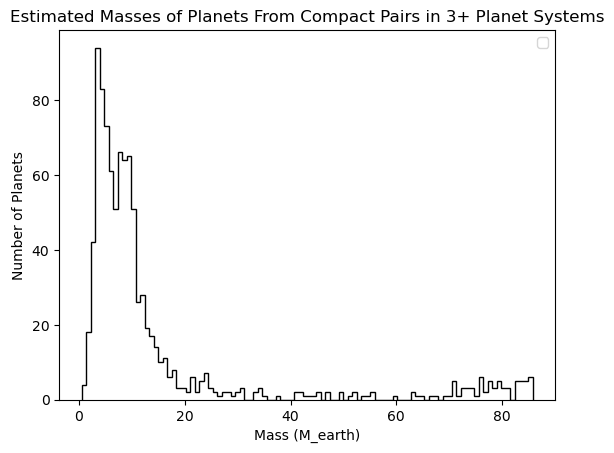

In [11]:
# PLANET MASS – CALCULATED AS M / M_earth = 2.7(R / R_earth)^1.3 (EMPIRICAL RELATIONSHIP)

# Create an array of planet radii
radii = planet_data['Radius (R_earth)'].to_numpy()

# Calculate planet masses
new_masses = [2.7 * r**1.3 for r in radii]

# Create a histogram
plt.hist(new_masses, bins = 100, color = 'black', histtype = 'step', stacked = True);

plt.xlabel("Mass (M_earth)");
plt.ylabel("Number of Planets");
plt.title("Estimated Masses of Planets From Compact Pairs in 3+ Planet Systems")
plt.legend();

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


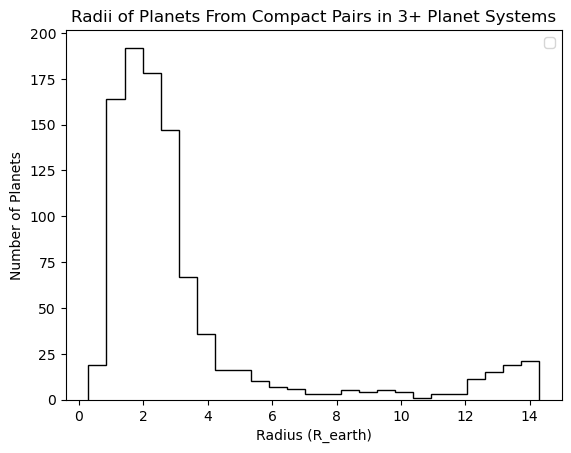

In [12]:
# PLANET RADII

# Create an array of planet radii (already created above – could delete this line)
radii = planet_data['Radius (R_earth)'].to_numpy()

# Create a histogram
plt.hist(radii, bins = 25, color = 'black', histtype = 'step', stacked = True);

plt.xlabel("Radius (R_earth)");
plt.ylabel("Number of Planets");
plt.title("Radii of Planets From Compact Pairs in 3+ Planet Systems")
plt.legend();

Number of period ratios: 656


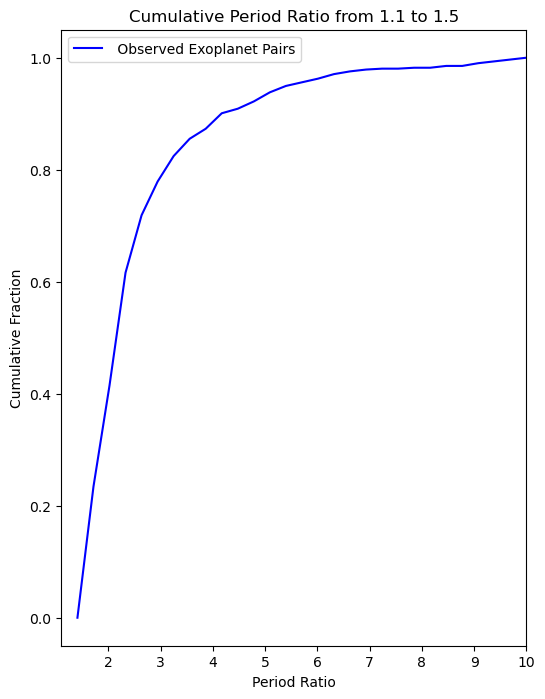

<Figure size 1000x100 with 0 Axes>

'\n\nno_nan_masses = masses[~np.isnan(masses)]\nno_nan_masses = no_nan_masses[no_nan_masses < 25]\n\n# Create a histogram\ndensity = stats.gaussian_kde(no_nan_masses)\nn, x, _ = plt.hist(no_nan_masses,  bins=np.linspace(0, 25, 20),\n                   histtype=u\'step\', density=True)  \nplt.plot(x, density(x))\nplt.title("Mass Distribution of Observed Compact Exoplanets in 3+ Planet Systems")\nplt.xlabel("Mass (Earth Masses)")\nplt.ylabel("Density")\n#plt.xscale("log")\nplt.show()\n\n'

In [13]:
# PERIOD RATIOS

print("Number of period ratios: " + str(len(all_p_ratios)))

# Create a histogram
"""
plt.hist(all_p_ratios, bins = 25, color = 'black', histtype = 'step', stacked = True);

plt.xlabel("Period Ratio");
plt.ylabel("Number of Planet Pairs");
plt.title("Period Ratios of Planets From Compact Pairs in 3+ Planet Systems")
plt.legend();
"""
bin_number = 30



fig = plt.figure()
fig.set_figheight(8)
fig.set_figwidth(6)



bins=np.linspace(1.1, 10, bin_number) 
#mask = pairs['Pratio'] < 1.5
count, edges = np.histogram(all_p_ratios, bins=bins)
values = count
pdf = count/sum(count)
observed_norm_cumulative = np.cumsum(pdf)
observed_period_pdf = count
observed_period_cdf = observed_norm_cumulative


plt.plot(edges[1:], observed_period_cdf, c = 'blue')
plt.legend([" Observed Exoplanet Pairs", "Observed Ratios"])
plt.title("Cumulative Period Ratio from 1.1 to 1.5")
#plt.title("p = " + '%.2E' % Decimal( str(prob_list[-1])  ) + "   Number of iterations: " + str(len(spock_p_list)))
plt.xlabel("Period Ratio")
plt.ylabel("Cumulative Fraction")
plt.xlim(1.1,10)
plt.figure(figsize=(10, 1))
plt.show()


"""

no_nan_masses = masses[~np.isnan(masses)]
no_nan_masses = no_nan_masses[no_nan_masses < 25]

# Create a histogram
density = stats.gaussian_kde(no_nan_masses)
n, x, _ = plt.hist(no_nan_masses,  bins=np.linspace(0, 25, 20),
                   histtype=u'step', density=True)  
plt.plot(x, density(x))
plt.title("Mass Distribution of Observed Compact Exoplanets in 3+ Planet Systems")
plt.xlabel("Mass (Earth Masses)")
plt.ylabel("Density")
#plt.xscale("log")
plt.show()

"""


mean: 0.13153669565217394
<class 'list'>


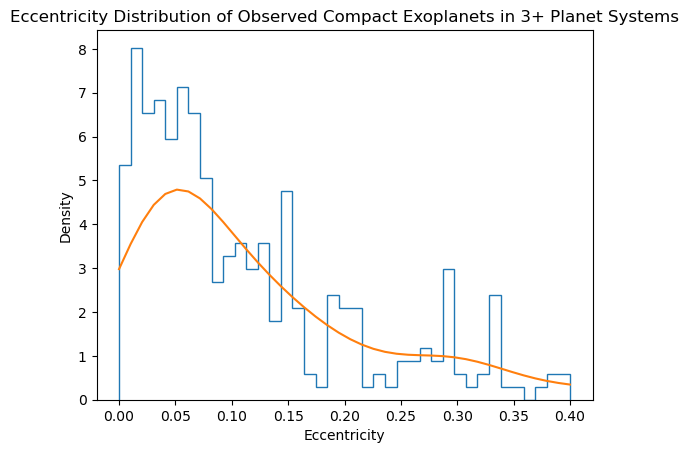

In [14]:
# PLANET ECCENTRICITY (REPORTED IN TABLE)
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.stats as stats
from scipy.stats import lognorm
import math
import random
from numpy.random import seed, random
from scipy.stats import rayleigh
from scipy.stats import norm
import itertools
from decimal import Decimal
import pandas as pd
import seaborn as sns



# Create an array of planet eccentricities and get rid of nans
eccentricity = planet_data['Eccentricity'].to_numpy()
no_nan_ecc = eccentricity[~np.isnan(eccentricity)]
no_nan_ecc = eccentricity[eccentricity != 0]

new_ecc = []
for temp_ecc in no_nan_ecc:
    if ~np.isnan(temp_ecc):
        new_ecc.append(temp_ecc)
        
no_nan_ecc = new_ecc
print("mean:", np.mean(no_nan_ecc))

# Create a histogram
print(type(no_nan_ecc)) # ChatGPT!!! no_nan_ecc is a list!!!
density = stats.gaussian_kde(no_nan_ecc)
n, x, _ = plt.hist(no_nan_ecc,  bins=np.linspace(0, 0.4, 40),
                   histtype=u'step', density=True)  
plt.plot(x, density(x))
plt.title("Eccentricity Distribution of Observed Compact Exoplanets in 3+ Planet Systems")
plt.xlabel("Eccentricity")
plt.ylabel("Density")
#plt.xscale("log")
plt.show()





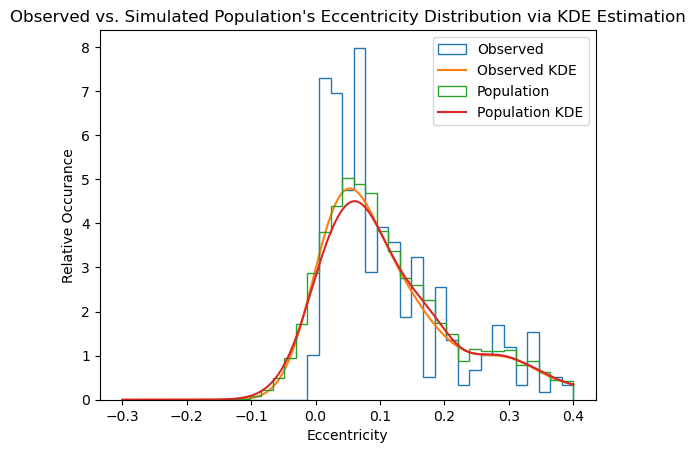

In [21]:
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
import numpy as np

# Load the data
eccentricity = planet_data['Eccentricity'].to_numpy()

# Remove NaN and infinite values from the array
eccentricity = eccentricity[~np.isnan(eccentricity)]
eccentricity = eccentricity[eccentricity != 0]
eccentricity = eccentricity[np.isfinite(eccentricity)]

# Fit a KDE to the data
kde = gaussian_kde(eccentricity)

# Generate 1000 samples from the KDE
new_ecc = kde.resample(size=10000)[0]

# Create a histogram of the original data
n, bins, patches = plt.hist(eccentricity, bins=np.linspace(-0.3, 0.4, 40), histtype='step', density=True, label = 'Observed')

# Plot the kernel density curve of the original data
x_grid = np.linspace(-0.3, 0.4, 200)
plt.plot(x_grid, kde(x_grid), label='Observed KDE')

# Create a histogram of the new samples
n_new, bins_new, patches_new = plt.hist(new_ecc, bins=bins, histtype='step', density=True, label = 'Population')

# Plot the kernel density curve of the new samples
kde_new = gaussian_kde(new_ecc)
plt.plot(x_grid, kde_new(x_grid), label='Population KDE')

# Set plot title, labels, and legend
plt.title("Observed vs. Simulated Population's Eccentricity Distribution via KDE Estimation")
plt.xlabel("Eccentricity")
plt.ylabel("Relative Occurance")
plt.legend()

# Show the plot
plt.show()


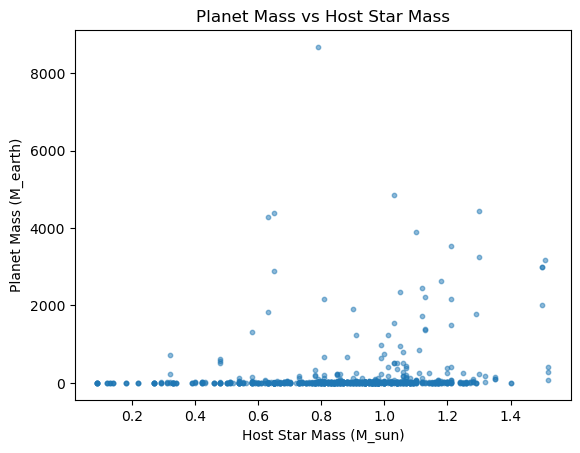

In [16]:

import matplotlib.pyplot as plt
import pandas as pd

# Load the data
host_mass = planet_data["Stellar Mass (M_sun)"].values
planet_mass = planet_data["Mass or Mass * sin(i) (M_earth)"].values

# Create the plot
fig, ax = plt.subplots()
ax.scatter(host_mass, planet_mass, s=10, alpha=0.5)
ax.set_xlabel("Host Star Mass (M_sun)")
ax.set_ylabel("Planet Mass (M_earth)")
ax.set_title("Planet Mass vs Host Star Mass")

plt.show()




351
351


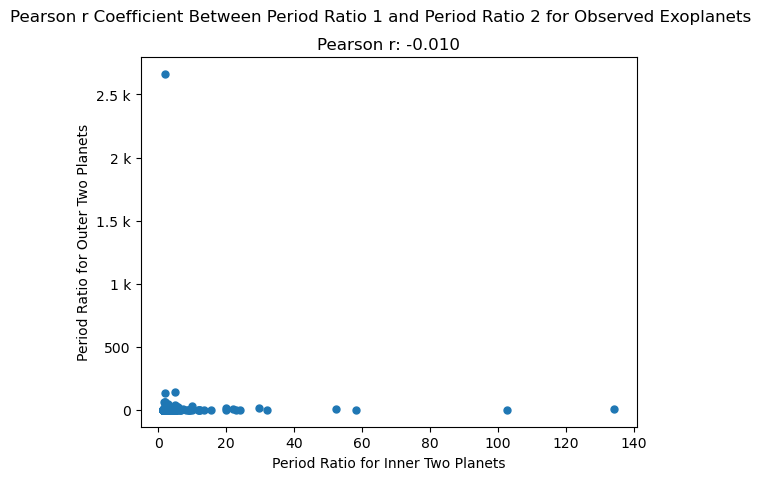

[9.44186046511628, 2.217996289424861, 19.892270341324945, 3.0303106827923227, 5.853298167296938, 9.020403321470937, 4.3322824053464535, 2.8053818792391136, 4.943996209379154, 4.345915273566799, 2.0877028714107366, 2.969313539902361, 4.896600903256478, 2.30858664735218, 1.5730897064254363, 2.321381324541051, 4.892341089478325, 1.7048586852969196, 1.59483421308871, 9.851700312824791, 29.640236262116414, 15.527098019383006, 2.031254881498001, 3.017494058430486, 2.8399097868114427, 3.04138900776426, 2.467315268955536, 4.926269308479436, 1.634222725563974, 7.205488288915835, 134.23467166197165, 2.3831647516792667, 2.1388182973316394, 5.2963017971186686, 3.240426514829834, 2.092083977695503, 1.5757575757575757, 1.5145924825174826, 1.5296028261504329, 31.94248485351481, 2.094835985709646, 3.3523037405683094, 1.8135670330196585, 102.62099570101235, 1.689811584089323, 2.63655782982714, 2.8085443037974684, 58.38638776360153, 2.6141902700668105, 2.0991325006299273, 2.19022659022659, 2.25130877000

In [17]:
import numpy as np
from matplotlib.ticker import StrMethodFormatter
from matplotlib.ticker import ScalarFormatter

#Calculate Pearson r
print(len(pearson_r_1))
print(len(pearson_r_2))
from matplotlib.ticker import EngFormatter


my_rho = np.corrcoef(pearson_r_1, pearson_r_2)


pearson_r = my_rho[0][1]

#plt.style.use('seaborn-whitegrid')



# Plot data
fig, ax = plt.subplots()
ax.plot(pearson_r_1, pearson_r_2, 'o', markersize=5)
ax.set_xlabel("Period Ratio for Inner Two Planets")
ax.set_ylabel("Period Ratio for Outer Two Planets")


# Format axis tick labels using EngFormatter
ax.xaxis.set_major_formatter(EngFormatter())
ax.yaxis.set_major_formatter(EngFormatter())

# Format title to 3 decimal places
title_str = "Pearson r: {:.3f}".format(pearson_r)
ax.set_title(title_str)
fig.suptitle('Pearson r Coefficient Between Period Ratio 1 and Period Ratio 2 for Observed Exoplanets')
plt.show()

print(pearson_r_1)
print(pearson_r_2)

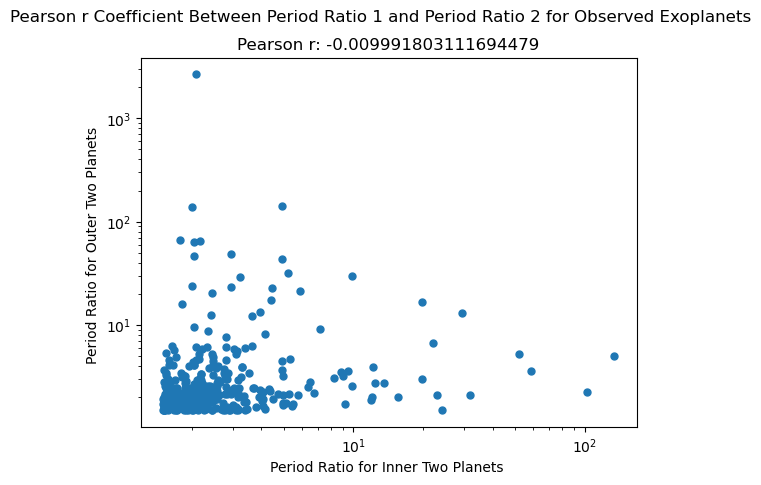

In [18]:
import numpy as np

#Extend pearson r calculation to 2


#Calculate Pearson r


my_rho = np.corrcoef(extend_pearson_r_1, extend_pearson_r_2)


pearson_r = my_rho[0][1]

#plt.style.use('seaborn-whitegrid')

plt.plot(extend_pearson_r_1, extend_pearson_r_2, 'o', markersize = 5)


plt.xlabel("Period Ratio for Inner Two Planets ")
plt.ylabel("Period Ratio for Outer Two Planets ")
plt.xscale('log')
plt.yscale('log')
plt.title("Pearson r: " + str(pearson_r))
plt.suptitle('Pearson r Coefficient Between Period Ratio 1 and Period Ratio 2 for Observed Exoplanets')
plt.show()


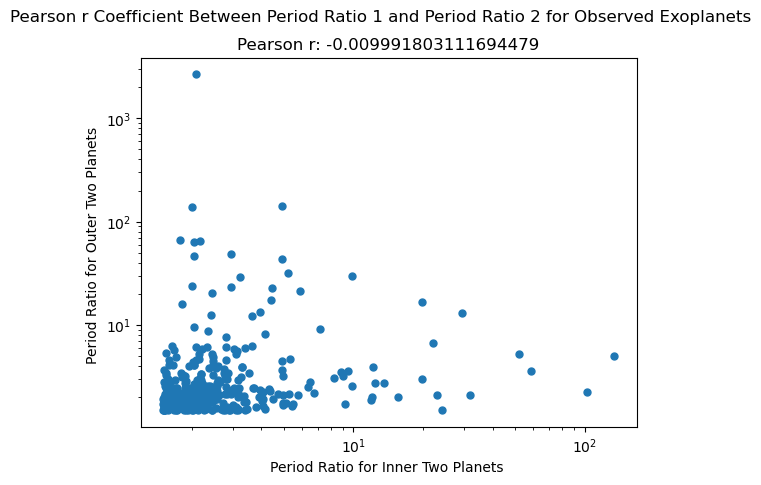

In [19]:
import numpy as np

#Calculate Pearson r


#Extend Pearson r calculation to 4, which is Ellie and Rorie's stuff


my_rho = np.corrcoef(extend_4_pearson_r_1, extend_4_pearson_r_2)


pearson_r = my_rho[0][1]

#plt.style.use('seaborn-whitegrid')

plt.plot(extend_4_pearson_r_1, extend_4_pearson_r_2, 'o', markersize = 5)


plt.xlabel("Period Ratio for Inner Two Planets ")
plt.ylabel("Period Ratio for Outer Two Planets ")
plt.xscale('log')
plt.yscale('log')
plt.title("Pearson r: " + str(pearson_r))
plt.suptitle('Pearson r Coefficient Between Period Ratio 1 and Period Ratio 2 for Observed Exoplanets')
plt.show()
